# "Linguistic Alignment in Social Media: Types of Alignment in Twitter Conversations under Various Measures"

#### Author: Kristina Harper

This notebook contains information regarding how Twitter data used for the dissertation titled above was initially imported. In addition, exploratory data analysis was conducted before preprocessing. 

In [1]:
import nltk
import pandas as pd
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from collections import Counter

### Read CSV file of dyadic Twitter conversations into dataframe

Twitter data is in the following format:
ID~a_id~a_username~a_unixtime~a_tweet~b_id~b_username~b_unixtime~b_tweet

Data file will not be enclosed here, nor will dataframes be loaded to show the information held in the tweets analyzed in this report, due to ethical review guidelines associated with Twitter user privacy regulations. 

In [5]:
# Translate csv to Dataframe 
# Uncomment to load using a csv file in the format above

tweetData = pd.read_csv('pairs_edit_utf_noSquig.csv', sep='~')
tweetData.head()

Get dataframe of Tweet ID's and Usernames for later comparison of how often users in the dataset tweet and reply.

In [6]:
#tweets_ID_Only = tweetData[['ID','a_tweet','b_tweet']].copy()
#tweets_ID_Only

UsernamesOnly = tweetData[['a_username','b_username']].copy()
UsernamesOnly.head()

In [7]:
# Create list of username pairs from dataframe

listUsernamePairs = UsernamesOnly.reset_index()[['a_username','b_username']].values.tolist()

tupleList = []
for item in listUsernamePairs:
    tupleList.append(tuple(item))
print(tupleList[0:5])

In [8]:
# Count number of tweet/reply messages for each username pair

count = Counter(tupleList)
count.most_common(10)

## Create visualizations tweet frequencies based on username use

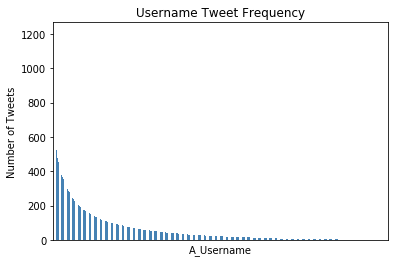

In [22]:
#Histogram of frequency that a_users are tweeting

plot1 = tweetData['a_username'].value_counts().plot.bar(color = 'steelblue')
plot1.tick_params(labelbottom=False, bottom=False,which='both')
plt.xlabel('A_Username')
plt.ylabel('Number of Tweets')
plt.title('Username Tweet Frequency')
plt.savefig('a_username')

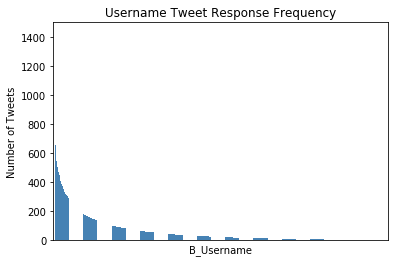

In [23]:
#Histogram of B-users tweeting

plot1 = tweetData['b_username'].value_counts().plot.bar(color='steelblue')
plot1.tick_params(labelbottom=False, bottom=False,which='both')
plt.xlabel('B_Username')
plt.ylabel('Number of Tweets')
plt.title('Username Tweet Response Frequency')
plt.savefig('b_username')

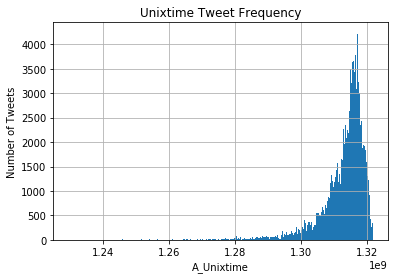

In [9]:
# Create histogram of times users have tweeted across dataset 


plot3 = tweetData['a_unixtime'].hist(bins=1000)
#plot2.tick_params(labelbottom=False, bottom=False,which='both')
plt.xlabel('A_Unixtime') 
plt.ylabel('Number of Tweets')
plt.title('Unixtime Tweet Frequency')
plt.savefig('a_unixtime_tweet_freq')

### Transform Unixtime to readable time

Plot the time frequencies to get a good idea about when people are tweeting throughout the day

In [5]:
import time
import datetime

ts = time.gmtime(1229599667 ) #Test a random time to implement in data transform
print(time.strftime("%H:%M:%S",ts))

11:27:47


In [6]:
readabletime  = tweetData[['a_unixtime']].copy()
readabletime['b_unixtime'] = tweetData[['b_unixtime']].copy()

In [ ]:
readabletime.head()

In [8]:
readabletime['a_unixtime'] = pd.to_datetime(readabletime['a_unixtime'], unit='s')
readabletime['b_unixtime'] = pd.to_datetime(readabletime['b_unixtime'], unit='s')

In [147]:
print('A min: ',tweetData['a_unixtime'].min())
print('A max: ',tweetData['a_unixtime'].max())
print('B min: ',tweetData['b_unixtime'].min())
print('B max: ',tweetData['b_unixtime'].max())

A min:  1229599667
A max:  1321821211
B min:  1229617078.0
B max:  1321822960.0


In [148]:
print('A min: ', (datetime.datetime.fromtimestamp(int(1229599667)).strftime('%Y-%m-%d %H:%M:%S')))
print('A max: ',(datetime.datetime.fromtimestamp(int(1321821211)).strftime('%Y-%m-%d %H:%M:%S')))
print('B min: ',(datetime.datetime.fromtimestamp(int(1229617078)).strftime('%Y-%m-%d %H:%M:%S')))
print('B max: ',(datetime.datetime.fromtimestamp(int(1321822960)).strftime('%Y-%m-%d %H:%M:%S')))

A min:  2008-12-18 11:27:47
A max:  2011-11-20 20:33:31
B min:  2008-12-18 16:17:58
B max:  2011-11-20 21:02:40


In [11]:
x=(readabletime.a_unixtime[0])
x

Timestamp('2008-12-18 11:27:47')

In [14]:
readabletime['Atimeonly'] = readabletime['a_unixtime'].dt.time

In [ ]:
readabletime['Btimeonly'] = readabletime['b_unixtime'].dt.time
readabletime

In [23]:

#readabletime['Atimeonly']=readabletime['Atimeonly'].astype('datetime64')
readabletime.Atimeonly[1]

datetime.time(11, 27, 47)

In [ ]:
#plot4 = readabletime['Atimeonly'].value_counts().plot.bar()
ax=(readabletime['a_unixtime'].groupby(readabletime['a_unixtime'].dt.hour).count()).plot(kind='bar')
#plot4 = readabletime['Atimeonly'].hist(bins=24)
#plot2.tick_params(labelbottom=False, bottom=False,which='both')
ax.set_xlabel('A Time Tweeted')
ax.set_ylabel('Number of Tweets')
ax.set_title('Tweet Frequency in 24 Hours')
#ax.savefig('TimeOfDayTweet_freq_2')

In [ ]:
readabletime['b_unixtime'].groupby(readabletime['b_unixtime'].dt.hour).count().plot(kind='bar')
#plot4 = readabletime['Atimeonly'].hist(bins=24)
#plot2.tick_params(labelbottom=False, bottom=False,which='both')
plt.xlabel('A Time Tweeted')
plt.ylabel('Number of Tweets')
plt.title('Tweet Frequency in 24 Hours')
plt.savefig('TimeOfDayTweet_freq_B')

In [83]:
blue = (readabletime['a_unixtime'].groupby(readabletime['a_unixtime'].dt.hour).count()) 
red = (readabletime['b_unixtime'].groupby(readabletime['b_unixtime'].dt.hour).count())

In [84]:
s2 = pd.concat([blue,red],axis=1)

In [ ]:
s2 # Counts for tweets during indexed hour

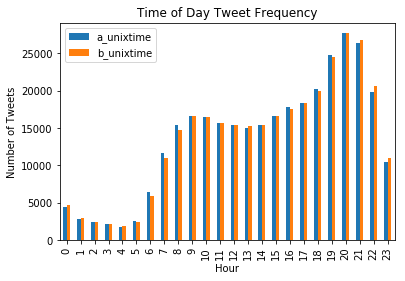

In [88]:
# Plot combined bar chart of the number of tweet and reply messages in a 24-hour day cycle.

#plt.figure();
s2.plot(kind='bar')
plt.title('Time of Day Tweet Frequency')
plt.xlabel('Hour')
plt.ylabel('Number of Tweets')
plt.savefig('TimeOfDayTweetReply')

### Determine average time difference between tweets and reply messages

In [ ]:
readabletime.head()

In [ ]:
readabletime['TimeDiff'] = readabletime['a_unixtime']-readabletime['b_unixtime']
readabletime

In [ ]:
readabletime['TimeDiff'] = readabletime['b_unixtime']-readabletime['a_unixtime']

In [ ]:
readabletime.head()

In [ ]:
TimeDifference = pd.DataFrame()
TimeDifference['diff'] = readabletime['TimeDiff'].copy()
TimeDifference.head()

In [30]:
readabletime.TimeDiff[1].seconds

17538

In [25]:
maxtime = readabletime.TimeDiff.max()
maxtime

Timedelta('105 days 10:15:40')

In [83]:
#resample TimeDiff data by minute then plot
#resampledTimeDiff = pd.DataFrame()
#resampledTimeDiff = readabletime.TimeDiff.resample('T').mean()
#TimeDifference['int mins']=(TimeDifference['diff']/np.timedelta64(1,'m')).astype(int)
TimeDifference['mins']=(TimeDifference['diff'].dt.seconds/60)+(TimeDifference['diff'].dt.days*1440)

In [89]:
TimeDifference.mins.min()

-58.59999999999991

In [86]:
TimeDifference.head()

,diff,int mins,mins
0,04:50:11,290,290.183333
1,04:52:18,292,292.300000
2,00:29:14,29,29.233333
3,01:14:18,74,74.300000
4,00:57:26,57,57.433333


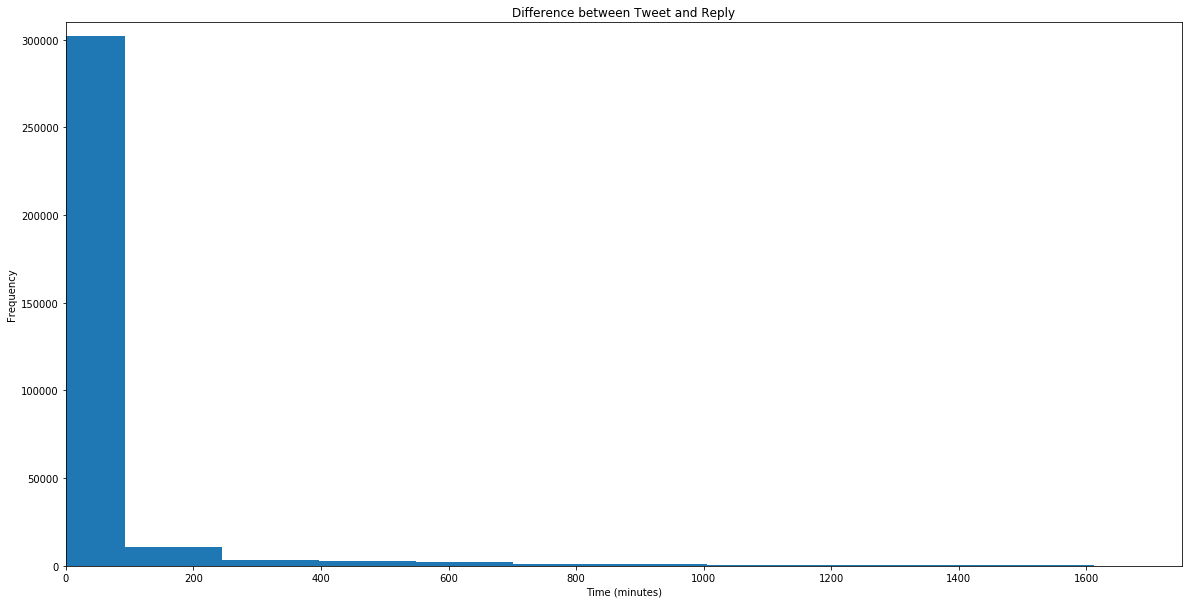

In [116]:
#readabletime['b_unixtime'].groupby(readabletime['b_unixtime'].dt.hour).count().plot(kind='bar')
#timePlot = (readabletime['int mins).count().plot(kind='bar')
timePlot = (TimeDifference['mins']).plot(kind='hist', bins=1000,figsize=(20,10))
timePlot.set_xlabel('Time (minutes)')
timePlot.set_xlim(0,1750)
timePlot.set_ylim(0,310000)
#timePlot.set_size(20,10)
timePlot.set_ylabel('Frequency')
timePlot.set_title('Difference between Tweet and Reply')
plt.savefig('TimeGapBWTweetReply')

In [134]:
#newdfagain = TimeDifference['mins'].copy()
#grouped = TimeDifference.groupby('mins') 
#grouped.filter(lambda x: x['mins']> 62.881425358049626)
#grouped.head()

grouped = TimeDifference[TimeDifference['mins']<62.881425358049626]

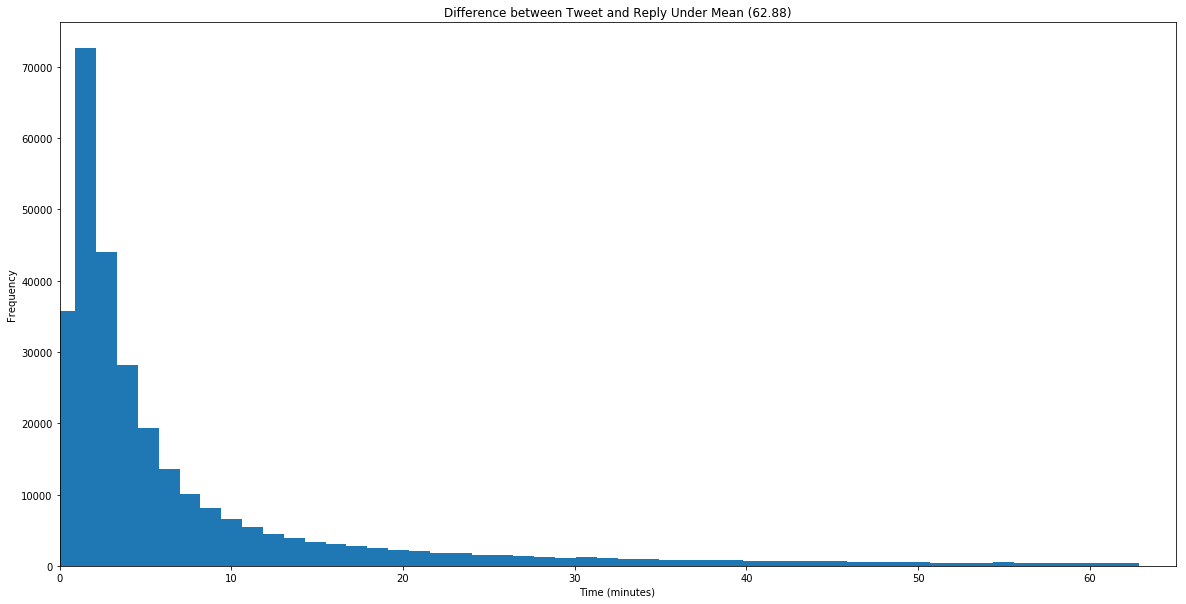

In [138]:
timePlot2 = (grouped['mins']).plot(kind='hist', bins=100,figsize=(20,10))
timePlot2.set_xlabel('Time (minutes)')
timePlot2.set_xlim(0,65)
#timePlot.set_ylim(0,300000)
#timePlot.set_size(20,10)
timePlot2.set_ylabel('Frequency')
timePlot2.set_title('Difference between Tweet and Reply Under Mean (62.88)')
plt.savefig('TimeGapBWTweetReply_lessthanmean_Fewerbins')

In [9]:
# Drop tweet with no reply from data. 
#TimeDifference.drop((TimeDifference.index[326166]),inplace=True)
#TimeDifference.tail()